## import libraries

In [98]:
import numpy as np
import matplotlib.pyplot as plt

## inputs of the model

In [99]:
# x, y inputs
x_n_list = np.array([[0,0], [0, 1], [1, 0], [1, 1]])
y_n_list = np.array([[-1], [1], [1], [-1]])
# we choose the parameters
epochs = 1000
learning_rate = 0.01
#choose defined seed
np.random.seed(4)
# Random initialization of the parameters
# (to the same extent we would choose the parameters non-randomly
# and the GD algorithm would still work...)
w_T = np.random.rand(2) 
U_T = np.random.rand(2, 2)
b_1 = np.random.rand(2)
b_2 = np.random.rand(1)
# Initialize Intermediate Variables
h = np.zeros((4, 2))
f_x = np.zeros((4, 1))
Loss = np.zeros(epochs)

## h and f(x)

In [100]:
def h(U, b1, x):
    temp = U.T @ x + b1
    return np.array([max(temp[0], [0]), max(temp[1], [0])])

def f(w, h, b2):
    return w.T @ h + b2

## Squared loss function

In [101]:
def Loss_func(y_true, y_pred):
    return (y_true - y_pred) ** 2
#for epoch in range(epochs):

    

## Derivatives

w_T is: [0.29474898 0.05619079]
b_2 is: [-0.00019462]
U_T is: [[-0.61256996 -0.39264709]
 [-0.01052774 -0.00718161]]
b_1 is: [-0.01631537  0.01029774]


Text(0, 0.5, 'LOSS')

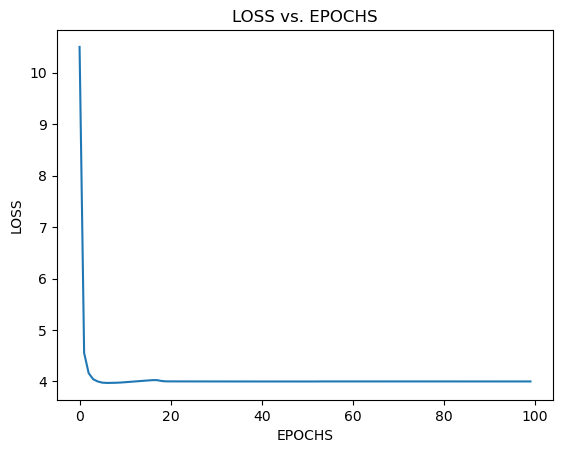

In [102]:
import numpy as np
import matplotlib.pyplot as plt


epochs = 100
L_R = 0.05

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[-1], [1], [1], [-1]])

np.random.seed(3)
w_T = np.random.rand(2) #+ np.array([-4, 3])
U_T = np.random.rand(2, 2)# + 1
b_1 = np.random.rand(2) #+ np.array([-1, -0.5])
b_2 = np.random.rand(1)# - 1
h = np.zeros((4, 2))
f_x = np.zeros((4, 1))
Loss = np.zeros(epochs)

for i in range(epochs):
    dL_db1 = np.zeros((4, 2))
    dL_dUT = np.zeros((2, 2))
    for row in range(len(x)):
        temp = U_T @ x[row] + b_1
        h[row, 0] = max(temp[0], 0)
        h[row, 1] = max(temp[1], 0)
        f_x[row] = w_T @ h[row] + b_2
        for j in range(len(w_T.T)):
            dL_db1[row, j] = 2*(f_x[row]-y[row])*w_T[j] if h[row, j] > 0 else 0
            for k in range(len(U_T)):
                derive = 2*(f_x[row]-y[row])*w_T[j]*x[row, k]
                dL_dUT[j, k] = derive if h[row, j] > 0 else 0

    Loss[i] = sum((y - f_x) ** 2)

    dL_dw = 2*sum((y-f_x)*(-h))  # dL_d(y-f_x)*d(y-f_x)_dw
    dL_db2 = 2*sum(f_x-y)

    w_T -= L_R * dL_dw
    b_2 -= L_R * dL_db2
    U_T -= L_R * sum(dL_dUT)
    b_1 -= L_R * sum(dL_db1)


print(f"w_T is: {w_T}")
print(f"b_2 is: {b_2}")
print(f"U_T is: {U_T}")
print(f"b_1 is: {b_1}")

plt.plot(range(epochs), Loss)
plt.title("LOSS vs. EPOCHS")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")




[-0.95577059 -0.06876886]
[-0.89106369]
[[1.53955972 1.67681866]
 [1.62746043 1.83164468]]
[-4.07149302  2.69973024]
0.023846988158282362


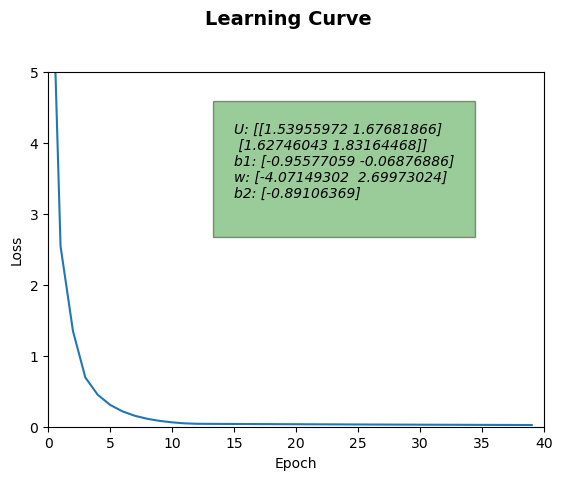

In [103]:

# ----------------------
# Deep Learning HW1: XOR
# ----------------------
import numpy as np
import matplotlib.pyplot as plt

epochs = 40  # number of epochs
lr = 0.01  # learning rate
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # data
y = np.array([-1, 1, 1, -1])  # labels
np.random.seed(10)


class Xor:
    def __init__(self):
        self.output = np.zeros(4)
        self.loss = np.zeros(epochs)
        self._initialize_model_parameters()

    def _initialize_model_parameters(self):
        self.size = 2, 2, 1  # n_input, n_hidden, n_out
        self.u = np.random.rand(self.size[0], self.size[0]) + np.matrix(np.array([[1, 1], [1, 1]]))
        self.b1 = np.random.rand(self.size[1]) + np.array([-1, -1/2])
        self.w = np.random.rand(self.size[1]) + np.array([-4, 3]).T
        self.b2 = np.random.rand(self.size[2]) - 1
        self.hidden = np.zeros((4, 2))

    def calc_xor(self):
        ux = self.u @ np.array([x[i, :] for i in range(4)]).T
        for i in range(self.size[0]**2):
            self.hidden[i, 0] = max(ux[0, i] + self.b1[0], 0)
            self.hidden[i, 1] = max(ux[1, i] + self.b1[1], 0)
            self.output[i] = self.w @ self.hidden[i, :] + self.b2

    def update_parameters(self, epoch: int):
        self.loss[epoch] = np.sum(np.power(y - self.output, 2))
        derive_loss_to_b1 = np.zeros((4, 2))
        derive_loss_to_u = np.zeros((4, 2, 2))
        for i in range(self.size[0]**2):
            for j in range(self.size[1]):
                if self.hidden[i, j] > 0:
                    derive_loss_to_b1[i, j] = 2 * (self.output[i] - y[i]) * self.w[j]
                else:
                    derive_loss_to_b1[i, j] = 0

        for i in range(self.size[0]**2):
            for r in range(self.size[1]):
                for c in range(self.size[1]):
                    if self.hidden[i, r] > 0:
                        derive_loss_to_u[i, r, c] = 2 * (self.output[i] - y[i]) * self.w[r] * x[i, c]
                    else:
                        derive_loss_to_u[i, r, c] = 0

        self.b1 -= lr * np.sum(derive_loss_to_b1)  # update b1
        self.u -= lr * np.sum(derive_loss_to_u)   # update u
        self.b2 -= lr * 2 * np.sum(self.output - y)  # update b2
        self.w -= lr * 2 * np.sum((self.output - y) @ self.hidden)  # update w

    def plot_loss(self):
        print(self.b1)
        print(self.b2)
        print(self.u)
        print(self.w)
        print(self.loss[-1])

        fig = plt.figure()
        ax = fig.add_subplot()
        fig.subplots_adjust(top=0.85)
        ax.axis([0, epochs, 0, 5])
        fig.suptitle('Learning Curve', fontsize=14, fontweight='bold')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.text(15, 3,
                'U: ' + str(self.u) + '\n' 
                'b1: ' + str(self.b1) + '\n' 
                'w: ' + str(self.w) + '\n' 
                'b2: ' + str(self.b2) + '\n',
                style='italic',
                bbox={'facecolor': 'green', 'alpha': 0.4, 'pad': 15})
        ax.plot(self.loss)
        plt.show()


def main():
    flag = True
    optimal_loss = 0.05
    while flag:
        xor = Xor()
        for epoch in range(epochs):
            xor.calc_xor()
            xor.update_parameters(epoch)
        flag = xor.loss[-1] > optimal_loss

    try:
        xor.plot_loss()
    except UnboundLocalError:
        print("Xor not initialized")


if __name__ == "__main__":
    main()
